# Project: 2DEG mobility calculation using mobilitypy¶

The mobility models are implemented using the following refs:

Ref-1: J. Bassaler, J. Mehta, I. Abid, L. Konczewicz, S. Juillaguet, S. Contreras, S. Rennesson, S. Tamariz, M. Nemoz, F. Semond, J. Pernot, F. Medjdoub, Y. Cordier, P. Ferrandis, Al-Rich AlGaN Channel High Electron Mobility Transistors on Silicon: A Relevant Approach for High Temperature Stability of Electron Mobility. Adv. Electron. Mater. 2024, 2400069. https://doi.org/10.1002/aelm.202400069

Ref-2: Zhang, J., Hao, Y., Zhang, J. et al. The mobility of two-dimensional electron gas in AlGaN/GaN heterostructures with varied Al content. Sci. China Ser. F-Inf. Sci. 51, 780–789 (2008). https://doi.org/10.1007/s11432-008-0056-7

Ref-3: 

# 1. Settings

## 1.1 Import modules

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
#import mobilitypy as mpy_old

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
from pathlib import Path
mobilitypy_tutorial_path = Path().absolute()
sys.path.insert(0, os.path.join(mobilitypy_tutorial_path, '../'))
from mobilitypy import AlloyParams, Mobility2DCarrier, Plottings

In [4]:
import mobilitypy
print(mobilitypy.__path__)

['/local/MyGitHub/mobilitypy/tutorials/../mobilitypy']


In [5]:
save_figure_dir = os.path.join(mobilitypy_tutorial_path,'../imgs')
save_file_name = 'mobilities'
savefigure = False
fig_dpi = 75

## 1.2 Set physical constants

In [6]:
alloy_disordered_effect=1
interface_roughness_effect=1
dislocation_effect=1
deformation_potential_effect=1 
piezoelectric_effect=1
acoustic_phonon_effect=1
polar_optical_phonon_effect=1
total_mobility=1
mobility_model='Bassaler'
#===============================
density_2deg = 0.1 # nm^-2
irf_rms_roughness = 0.3 # nm
irf_corr_length = 3.0 # nm
dislocation_density = 1e-4 # nm^-2
occup_dislocation = 0.3
T=300 #K

# 2. Calculate mobilities

In [7]:
compositions = np.linspace(0,1,101)
mu2deg = Mobility2DCarrier(compositions=compositions, binaries=['AlN', 'GaN'], alloy='AlGaN', system='ternary')

In [8]:
mobility_df = mu2deg.calculate_sheet_mobility(n_2d=density_2deg, rms_roughness=irf_rms_roughness, 
                                              corr_len=irf_corr_length, n_dis=dislocation_density, 
                                              f_dis=occup_dislocation, T=T,
                                              alloy_disordered_effect=alloy_disordered_effect,
                                              interface_roughness_effect=interface_roughness_effect,
                                              dislocation_effect=dislocation_effect,
                                              deformation_potential_effect=deformation_potential_effect,
                                              piezoelectric_effect=piezoelectric_effect,
                                              acoustic_phonon_effect=acoustic_phonon_effect,
                                              polar_optical_phonon_effect=polar_optical_phonon_effect,
                                              total_mobility=total_mobility,
                                              mobility_model=mobility_model)

In [10]:
mobility_df

,comp,AD,IFR,DIS,POP,AP,DP,PE,TOT
0,0.000,NaN,29521.190222,52086.338699,2098.639802,6837.793042,9963.126580,21797.928689,1479.688333
1,0.010,18850.521227,29292.522316,51812.142657,2084.447468,6728.944787,9847.621505,21247.505719,1360.834930
2,0.020,8990.041088,29067.232583,51540.939329,2070.432139,6622.200800,9733.699566,20716.226458,1251.505865
3,0.030,5726.796516,28845.251985,51272.679348,2056.590558,6517.512743,9621.329262,20203.235495,1151.458962
4,0.040,4111.046923,28626.513277,51007.314418,2042.919542,6414.833542,9510.479896,19707.724481,1060.255427
...,...,...,...,...,...,...,...,...,...
96,0.960,614.753586,16864.012614,34735.829977,1244.544507,1766.446133,3283.933076,3822.695744,324.215335
97,0.970,811.137366,16790.590013,34617.203351,1238.999471,1743.685151,3242.459121,3772.301849,370.112358
98,0.980,1204.661497,16717.862515,34499.401594,1233.496525,1721.216892,3201.324328,3722.819965,432.788241
99,0.990,2386.712137,16645.820966,34382.415735,1228.035157,1699.035788,3160.524296,3674.229295,523.279595


In [11]:
composition_axis = np.array(mobility_df['comp'], dtype=float)
mu_total = np.array(mobility_df['TOT'], dtype=float)

In [12]:
# Unit of sheet resitance: ohm per square
sheet_resistance = mu2deg.calculate_sheet_resitance(density_2deg, mu_total)
data_sheet_resitance_2_plot = np.column_stack((composition_axis, sheet_resistance))

In [13]:
# Unit of lateral_FOM: MW/cm^2
lateral_FOM = mu2deg.calculate_figure_of_merit(density_2deg, mu_total)
data_FOM_2_plot = np.column_stack((composition_axis, lateral_FOM))# LFOM: MW/cm^2

# 3. Plot mobilities

In [14]:
plt2deg = Plottings(save_figure_dir=save_figure_dir)
x_label = 'Al composition'
y_label = r'Electron mobility ($\mathrm{cm}^2\mathrm{V}^{-1}\mathrm{s}^{-1}$)'

Save file name: mobilities_300K.png


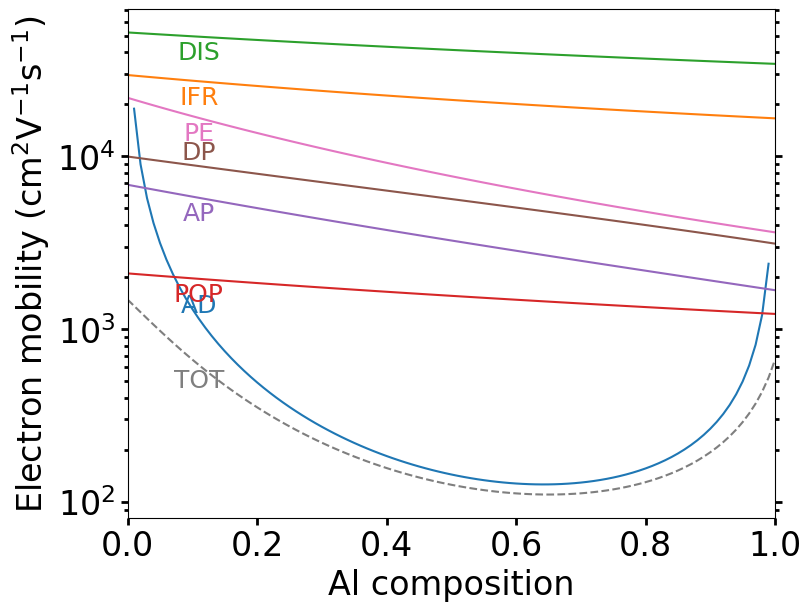

In [15]:
save_file_name_ = f'{save_file_name}_{T}K.png'
print(f'Save file name: {save_file_name_}')
fig, ax,_ = plt2deg.plot_2d_carrier_mobilities(mobility_df, save_file_name=save_file_name_,
                                               ymin=None, ymax=None, xmax=1, xmin=0, y_scale_log=True, 
                                               annotate_pos=(11,11), show_right_ticks=True,
                                               mode='2d_carrier_mobility', yaxis_label=y_label, 
                                               xaxis_label=x_label, color=None, color_map='viridis', 
                                               savefig=savefigure, dpi=fig_dpi, show_plot=True)

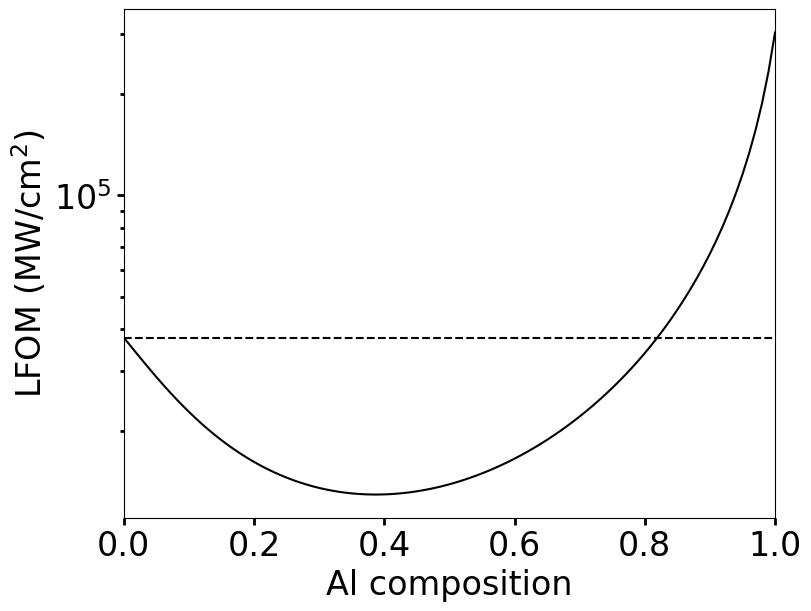

In [14]:
save_file_name_ = f'LFOM_{T}K.png'
fig, ax, _ = plt2deg.plot_2d(data_FOM_2_plot, save_file_name=save_file_name_,
                             ymin=None, ymax=None, xmax=1.0, xmin=0, y_scale_log=True,
                             yaxis_label=r'LFOM (MW/cm$^2$)', xaxis_label=x_label,
                             color='k', color_map='viridis', savefig=savefigure, 
                             dpi=fig_dpi, show_plot=False)
ax.axhline(y=data_FOM_2_plot[0,1], c='k', ls='--')
#plt.show()

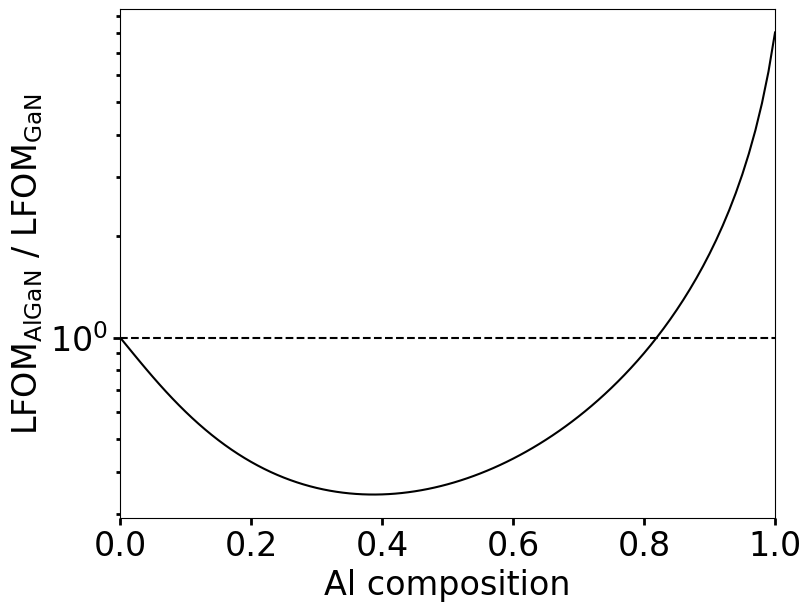

In [15]:
save_file_name_ = f'LFOM_norm_{T}K.png'
YY = data_FOM_2_plot.copy()
YY[:, 1] /= YY[0, 1]
fig, ax, _ = plt2deg.plot_2d(YY, save_file_name=save_file_name_,
                             ymin=None, ymax=None, xmax=1, xmin=0, y_scale_log=True,
                             yaxis_label=r'LFOM$_\mathrm{AlGaN}$ / LFOM$_\mathrm{GaN}$', 
                             xaxis_label=x_label, color='k', color_map='viridis', 
                             savefig=0, show_plot=False)
ax.axhline(y=1, c='k', ls='--')
plt2deg.save_figure(save_file_name_,fig=fig, savefig=savefigure, dpi=fig_dpi)

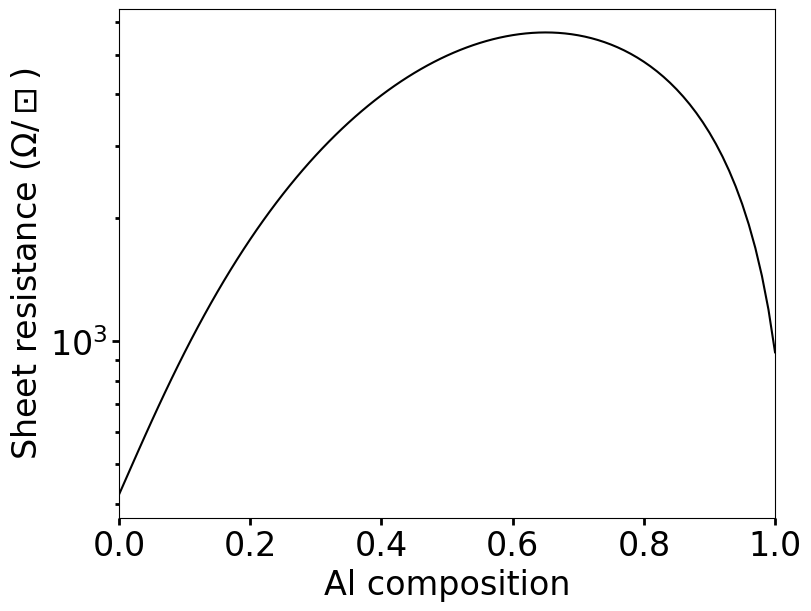

In [16]:
save_file_name_ = f'sheet_resistamce_{T}K.png'
#data_sheet_resitance_2_plot[:, 1] /= data_sheet_resitance_2_plot[0, 1]
fig, ax, _ = plt2deg.plot_2d(data_sheet_resitance_2_plot, save_file_name=save_file_name_,
                             ymin=None, ymax=None, xmax=1, xmin=0, y_scale_log=True,
                             yaxis_label=r'Sheet resistance ($\Omega /\boxdot$)', 
                             xaxis_label=x_label, color='k', color_map='viridis', 
                             savefig=0, show_plot=False)
#ax.axhline(y=data_FOM_2_plot[0,1], c='k', ls='--')
plt2deg.save_figure(save_file_name_,fig=fig, savefig=savefigure, dpi=fig_dpi)